<a href="https://colab.research.google.com/github/Vale150299/espd1-test/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data organisation and how to download ERA5

The full ERA5 and ERA5T datasets are held in the ECMWF data archive (MARS) and a pertinent sub-set of these data, interpolated to a regular latitude/longitude grid, has been copied to the C3S Climate Data Store (CDS) disks. On the CDS disks, where most single level and pressure level parameters are available, analyses are provided rather than forecasts, unless the parameter is only available from the forecasts.

1. This is formatted as code copy and store your API key in file $HOME/.cdsapirc. You find it at the bottom of your personal profile when you are logged in the CDS.

In [1]:
# Define the content of the .cdsapirc file
cdsapirc_content = """
url: https://cds.climate.copernicus.eu/api/v2
key: 305621:c1c175cb-f45e-4395-8f13-3b3feef879d6
"""

# Write the content to the .cdsapirc file in the home directory
with open('/root/.cdsapirc', 'w') as file:
    file.write(cdsapirc_content)


This Python code will create a file named .cdsapirc in the home directory of the Colab environment (/root/), and it will write your CDS API key information into that file.
After running this code cell in Colab, you should have the .cdsapirc file with your API key stored in the appropriate location.

2. Install modules

In [2]:
!pip install cdsapi
!pip install xarray

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.1-py3-none-any.whl size=21131 sha256=21c6ed812af6064f36c9f15872958ae0abcaa8072f1ab1d5763ea3fd5e888e09
  Stored in directory: /root/.cache/pip/wheels/9b/d9/5f/36a39fd10d15b5b2d362ad6dc8a1bd28a3b1e14e08357944bf
Successfully built multiurl


3. Retrieve the ERA5 or ERA5T data: Use the retrieve method of the cdsapi.Client object to download the desired dataset. You will need to specify parameters such as the variable, time period, geographical extent, and resolution.

In [3]:
import cdsapi

In [4]:
c = cdsapi.Client()

In [62]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "06:00:00/18:00:00",
    "type": "an",
    "format": "netcdf"
}, "test.nc4")

2024-05-13 14:10:40,657 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-13 14:10:40,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-13 14:10:41,076 INFO Request is queued
INFO:cdsapi:Request is queued
2024-05-13 14:11:14,223 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-13 14:11:14,227 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/adaptor.mars.external-1715609465.7239506-22562-8-1f7bbc53-7b16-4d32-a7f7-095c38729aa3.nc to test.nc4 (9.7K)
INFO:cdsapi:Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/adaptor.mars.external-1715609465.7239506-22562-8-1f7bbc53-7b16-4d32-a7f7-095c38729aa3.nc to test.nc4 (9.7K)
2024-05-13 14:11:15,129 INFO Download rate 10.8K/s
INFO:cdsapi:Download rate 10.8K/s


Result(content_length=9948,content_type=application/x-netcdf,location=https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/adaptor.mars.external-1715609465.7239506-22562-8-1f7bbc53-7b16-4d32-a7f7-095c38729aa3.nc)

In [5]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00/21:00:00",
    "type": "an",
    "format": "netcdf"
}, "test.nc")

2024-05-13 12:02:44,979 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-13 12:02:44,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-13 12:02:45,262 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-13 12:02:45,265 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.external-1715595596.0164516-15412-12-ed8e2319-fc88-4c4e-ab56-d4aa80e6989a.nc to test.nc (9.7K)
INFO:cdsapi:Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.external-1715595596.0164516-15412-12-ed8e2319-fc88-4c4e-ab56-d4aa80e6989a.nc to test.nc (9.7K)
2024-05-13 12:02:46,185 INFO Download rate 10.6K/s
INFO:cdsapi:Download rate 10.6K/s


Result(content_length=9952,content_type=application/x-netcdf,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.external-1715595596.0164516-15412-12-ed8e2319-fc88-4c4e-ab56-d4aa80e6989a.nc)

In the script, the 'grid' parameter specifies the latitude/longitude grid resolution for the data extraction. Here, it's set to [1.0, 1.0], which means that the data will be provided on a grid where each grid cell represents 1 degree of latitude by 1 degree of longitude.

The default grid resolution for ERA5 data is 5.625 x 5.625 degrees. By setting 'grid': [1.0, 1.0], you are requesting a coarser grid resolution, which might result in faster data retrieval and smaller file sizes compared to using the default grid resolution.

Here's a breakdown of the parameters you're using in your request:

-class: Specifies the type of data, which is "ea" for ERA5 reanalysis data.
-date: Specifies the date for which you want to retrieve data. In this case, it's January 1, 2023.

-expver: Specifies the version of the dataset, which is "1" in this case.

-levelist: Specifies the pressure level(s) for which you want data. Here, it's "1", indicating the first pressure level.

-levtype: Specifies the type of vertical level. "ml" stands for model level.

-param: Specifies the parameter code.Here, "130" represents temperature.

-stream: Specifies the data stream, which is "oper" for operational data.

-time: Specifies the time of day for which you want data. Here, it's 09:00:00.

-type: Specifies the type of data, either analysis ("an") or forecast ("fc").

Finally, the retrieved data will be saved in a file named "test.nc" in NetCDF format.

In [26]:
c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00/21:00:00",
    "type": "4v",
    "format": "netcdf"
}, "test.nc2")

2024-05-13 12:25:02,671 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-13 12:25:02,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-13 12:25:24,404 INFO Request is running
INFO:cdsapi:Request is running
2024-05-13 12:25:35,941 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-13 12:25:35,947 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.external-1715603124.8418725-9691-16-aed105ee-c413-4de4-960a-95e287de2cab.nc to test.nc2 (9.7K)
INFO:cdsapi:Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.external-1715603124.8418725-9691-16-aed105ee-c413-4de4-960a-95e287de2cab.nc to test.nc2 (9.7K)
2024-05-13 12:25:36,806 INFO Download rate 11.4K/s
INFO:cdsapi:Download rate 11.4K/s


Result(content_length=9948,content_type=application/x-netcdf,location=https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.external-1715603124.8418725-9691-16-aed105ee-c413-4de4-960a-95e287de2cab.nc)

In [7]:
import xarray as xr

# Open the NetCDF file
data = xr.open_dataset("test.nc")

# Access the temperature values
temperature_values = data['t']

# Print the first few rows of the temperature values
print(temperature_values)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [8]:
xr.open_dataset("test.nc")

<xarray.Dataset>
Dimensions:    (longitude: 64, latitude: 33, time: 2)
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-13 10:19:56 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

The output shows the structure and metadata of the temperature variable 't':

-It's a DataArray with dimensions (time: 2, latitude: 33, longitude: 64), meaning it contains a single time step, 33 latitude points, and 64 longitude points.

In [28]:
import xarray as xr

# Open the NetCDF file
data2 = xr.open_dataset("test.nc2")

# Access the temperature values
temperature_values2 = data2['t']

# Print the first few rows of the temperature values
print(temperature_values2)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [29]:
xr.open_dataset("test.nc2")

<xarray.Dataset>
Dimensions:    (longitude: 64, latitude: 33, time: 2)
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-13 12:25:25 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [31]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "06:00:00/18:00:00",
    "type": "fc",
    "format": "netcdf"
}, "test.nc3")

2024-05-13 12:39:21,776 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-13 12:39:21,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-13 12:39:22,056 INFO Request is queued
INFO:cdsapi:Request is queued
2024-05-13 12:39:55,238 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-13 12:39:55,243 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.external-1715603991.0803204-7576-15-f54b420f-f955-43d5-abde-e5784f14ecd6.nc to test.nc3 (9.7K)
INFO:cdsapi:Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.external-1715603991.0803204-7576-15-f54b420f-f955-43d5-abde-e5784f14ecd6.nc to test.nc3 (9.7K)
2024-05-13 12:39:56,224 INFO Download rate 10K/s
INFO:cdsapi:Download rate 10K/s


Result(content_length=9948,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.external-1715603991.0803204-7576-15-f54b420f-f955-43d5-abde-e5784f14ecd6.nc)

In [33]:
import xarray as xr

# Open the NetCDF file
data3 = xr.open_dataset("test.nc3")

# Access the temperature values
temperature_values3 = data3['t']

# Print the first few rows of the temperature values
print(temperature_values3)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T06:00:00 2023-01-01T18:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


# Plotting on a map the data

In [9]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.7 MB/s eta 0:00:00


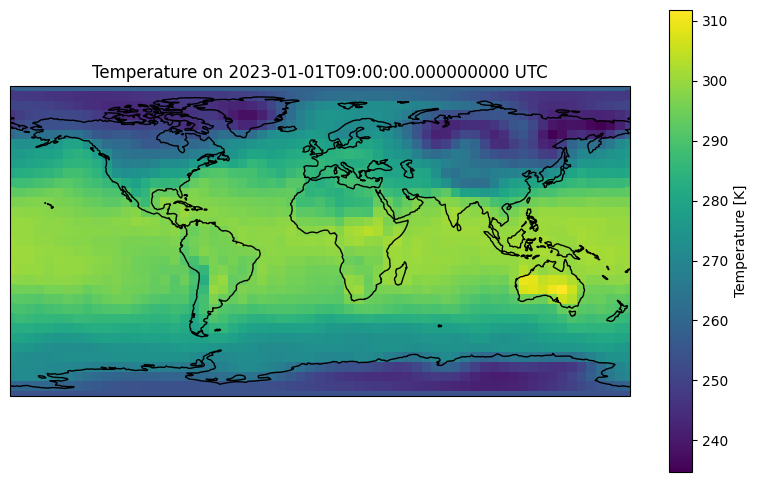

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values.min(),
                                                     vmax=temperature_values.max())

# Add coastlines
ax.coastlines()

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values.time.values[0]))

# Show the plot
plt.show()


Defining a projection, in the context of geographical plotting, means specifying how the three-dimensional surface of the Earth should be represented on a two-dimensional plane. Since the Earth is roughly spherical, representing its surface on a flat surface requires a projection, which inevitably introduces distortions in properties like distance, area, shape, or direction.

The Plate Carrée projection, which is one of the simplest projections commonly used for visualizing data on a latitude-longitude grid. In the Plate Carrée projection, the latitude and longitude lines form a regular grid, with lines of latitude and longitude appearing as straight, evenly spaced lines. However, this projection results in significant distortion, particularly at higher latitudes, where distances between lines of latitude and longitude
 become increasingly exaggerated.




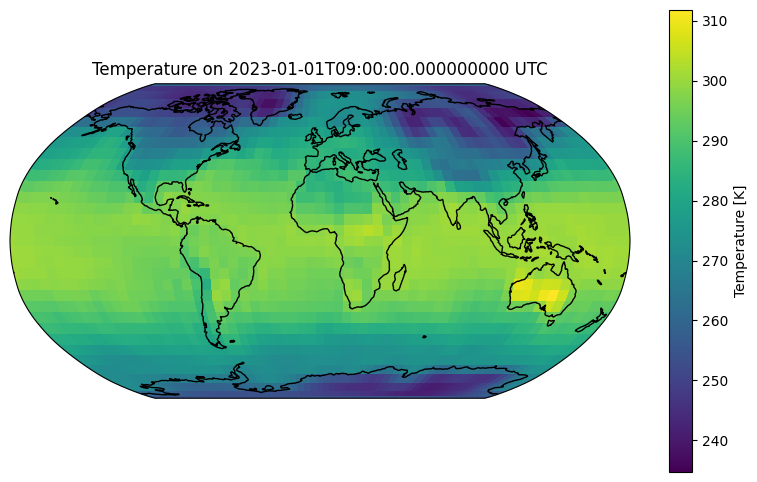

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (Robinson)
ax = plt.axes(projection=ccrs.Robinson())

# Plot temperature data (replace with your actual data)
pcm = temperature_values.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values.min(),
                                                     vmax=temperature_values.max())

# Add coastlines
ax.coastlines()

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values.time.values[0]))

# Show the plot
plt.show()


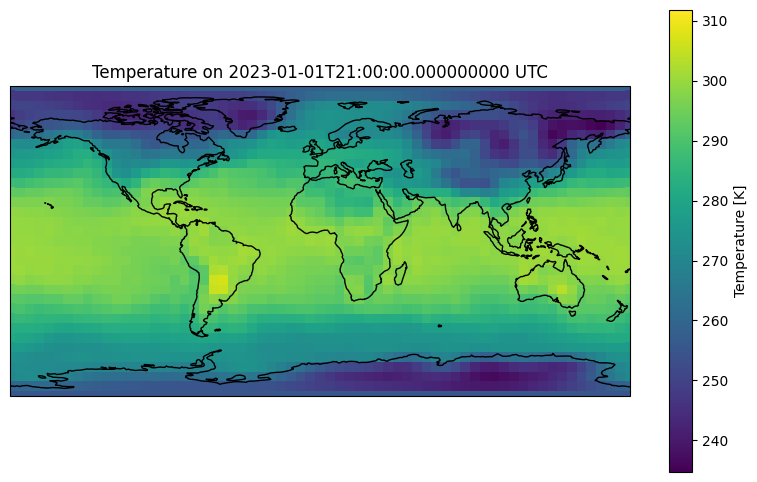

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values.isel(time=1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values.min(),
                                                     vmax=temperature_values.max())

# Add coastlines
ax.coastlines()

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values.time.values[1]))

# Show the plot
plt.show()


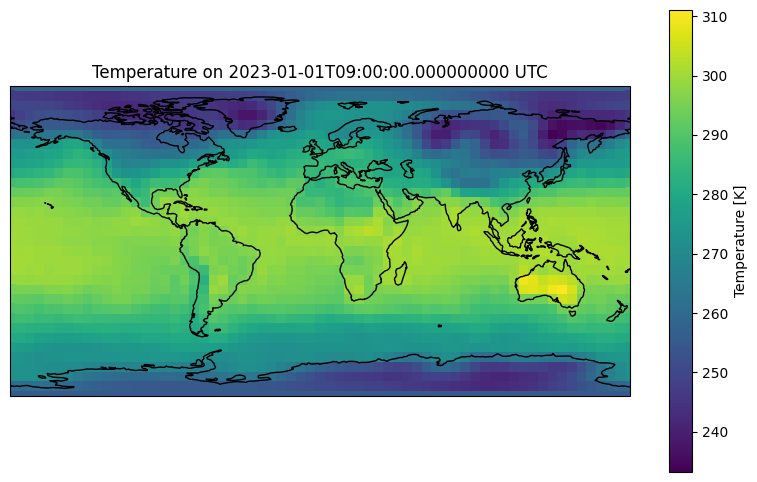

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values2.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values2.min(),
                                                     vmax=temperature_values2.max())

# Add coastlines
ax.coastlines()

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values2.time.values[0]))

# Show the plot
plt.show()


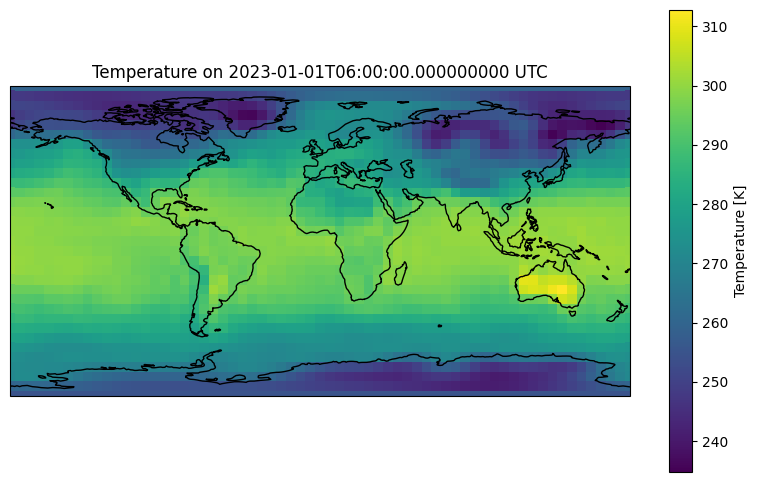

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values3.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values3.min(),
                                                     vmax=temperature_values3.max())

# Add coastlines
ax.coastlines()



# Add title
plt.title('Temperature on {} UTC'.format(temperature_values3.time.values[0]))

# Show the plot
plt.show()


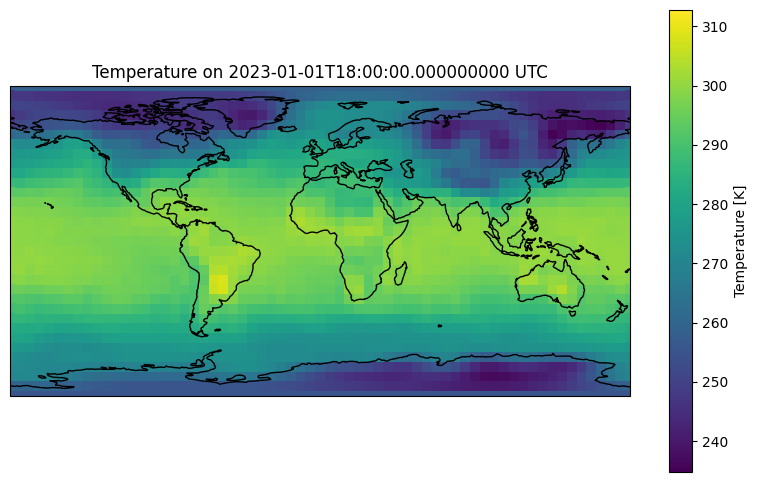

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values3.isel(time=1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values3.min(),
                                                     vmax=temperature_values3.max())

# Add coastlines
ax.coastlines()



# Add title
plt.title('Temperature on {} UTC'.format(temperature_values3.time.values[1]))

# Show the plot
plt.show()


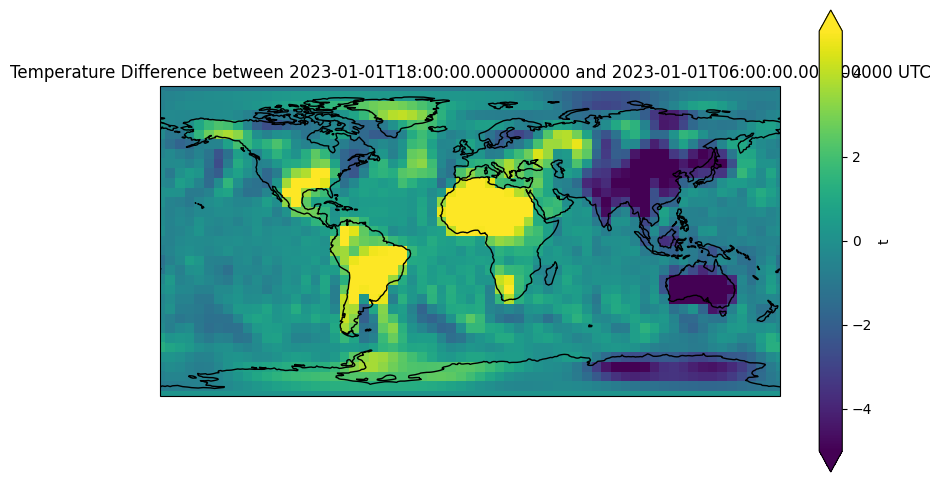

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Calculate temperature difference between time steps
temperature_difference = temperature_values3.isel(time=1) - temperature_values3.isel(time=0)

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature difference data
pcm = temperature_difference.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                              x='longitude', y='latitude',
                                              cmap='viridis',  # Choose a diverging colormap
                                              vmin=-5, vmax=5)  # Set color scale symmetrically around 0

# Add coastlines
ax.coastlines()

# Add title
plt.title('Temperature Difference between {} and {} UTC'.format(temperature_values3.time.values[1], temperature_values3.time.values[0]))

# Show the plot
plt.show()


Plot that shows the difference between two time steps that are 12 hours apart.
It is clear that over the land the T varies a lot with respect to the ocean because the ocean has more heat capacity.

# Interpolate the ERA5 data onto a ICON

The grid used in this dataset appears to be a regular grid, as indicated by the longitude and latitude coordinates.

-The longitude coordinates range from 0 to 360 degrees with a spacing of approximately 5.625 degrees.

-The latitude coordinates range from 90 degrees (North Pole) to -90 degrees (South Pole) with a spacing of approximately -5.625 degrees.

This regular grid means that the data is evenly spaced in both longitude and latitude directions, which is common in many climate and atmospheric datasets. Each grid cell represents a specific geographic location with a uniform spacing between neighboring grid points

The geographic coordinates of the ICON model are stored in an unstructured grid format, and these grid files are stored separately from the model data. They're accessible to the public via a file server hosted at DKRZ, specifically under the directory /pool/data/ICON/grids. This setup likely allows researchers and users to access and utilize the grid files for various purposes related to the ICON model.

http://icon-downloads.mpimet.mpg.de/

It seems like this is the website where users can download files related to the ICON model. The URL suggests that it's hosted by the Max Planck Institute for Meteorology (MPIMET). This could be a valuable resource for accessing various data and files associated with the ICON model for research and analysis purposes.

Specific path to a grid file: "icon_grid_0008_R02B05_G.nc". This file likely contains grid information for the ICON model, possibly related to a specific resolution or version ("0008_R02B05").

grids/public/edzw/icon_grid_0008_R02B05_G.nc




In [42]:
import requests

url = "http://icon-downloads.mpimet.mpg.de/grids/public/edzw/icon_grid_0001_R02B05_R.nc"
filename = "icon_grid_0001_R02B05_R.nc"

response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)


In [43]:
!apt-get install cdo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cdo is already the newest version (2.0.4-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [45]:
import netCDF4 as nc

filename = "icon_grid_0001_R02B05_R.nc"

# Open the NetCDF file
with nc.Dataset(filename, "r") as nc_file:
    # Access the data or metadata as needed
    print(nc_file)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    title: ICON grid description
    history: /e/uhome/dreinert/icon/build/sx9
    institution: Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source: icon-dev
    uuidOfHGrid: eee9e788-1dd1-11b2-aedb-c760324270de
    number_of_grid_used: 1
    ICON_grid_file_uri: http://icon-downloads.mpimet.mpg.de/grids/public/icon_grid_0001_R02B05_R.nc
    centre: 78
    subcentre: 255
    outname_style: 2
    grid_mapping_name: lat_long_on_sphere
    crs_id: urn:ogc:def:cs:EPSG:6.0:6422
    crs_name: Spherical 2D Coordinate System
    ellipsoid_name: Sphere
    semi_major_axis: 6371229.0
    inverse_flattening: 0.0
    grid_level: 5
    grid_root: 2
    grid_ID: 0
    parent_grid_ID: -1
    max_childdom: 1
    dimensions(sizes): cell(81920), vertex(40962), edge(122880), nc(2), nv(3), ne(6), no(4), two_grf(2), max_chdom(1), cell_grf(14), edge_grf(24), vert_grf(13), cell_delaunay(163

In [46]:
!cdo remapcon,icon_grid_0001_R02B05_R.nc test.nc output_icon_grid_data.nc

cdo    remapcon: YAC first order conservative weights from lonlat (64x33) to unstructured (81920) grid
cdo    remapcon:   0%  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%100%                     cdo  

It seems like the cdo remapcon command was successfully executed. Here's what the output indicates:

-remapcon: YAC first order conservative weights from lonlat (64x33) to unstructured (81920) grid: This message shows that cdo applied first-order conservative remapping weights from a regular lon-lat grid of size 64x33 to an unstructured grid with 81920 points. This indicates that the data from a regular grid was remapped to an unstructured grid, possibly the ICON model grid.

-remapcon: Processed 4224 values from 1 variable over 2 timesteps [0.65s 346MB]: This message indicates that cdo processed 4224 values from 1 variable over 2 timesteps. It also provides information about the processing time (0.65 seconds) and memory usage (346MB).

In [47]:
xr.open_dataset("output_icon_grid_data.nc")

<xarray.Dataset>
Dimensions:    (time: 2, cell: 81920, nv: 3)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
    clon       (cell) float64 ...
    clat       (cell) float64 ...
Dimensions without coordinates: cell, nv
Data variables:
    clon_bnds  (cell, nv) float64 ...
    clat_bnds  (cell, nv) float64 ...
    t          (time, cell) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 2.0.4 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/ic...
    uuidOfHGrid:          eee9e788-1dd1-11b2-aedb-c760324270de
    history:              Mon May 13 13:28:11 2024: cdo remapcon,icon_grid_00...
    CDO:                  Climate Data Operators version 2.0.4 (https://mpime...

clon represents the central longitude value for each grid cell, clon_bnds would represent the boundaries or limits of longitude for each cell.
The same for clat.

In [48]:
import xarray as xr

# Open the dataset
ds = xr.open_dataset("output_icon_grid_data.nc")

# Access the tmeperature values
icon_temperatures = ds['t']

# Print dataset information
print(icon_temperatures)

<xarray.DataArray 't' (time: 2, cell: 81920)>
[163840 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
    clon     (cell) float64 ...
    clat     (cell) float64 ...
Dimensions without coordinates: cell
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    CDI_grid_type:  unstructured


In [49]:
import numpy as np
x = np.rad2deg(ds.clon)
y = np.rad2deg(ds.clat)

Convert vertex coordinates from radians to degrees

In [50]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER

In [22]:
import matplotlib.tri as tri
triang = tri.Triangulation(x, y)

Triangulation: this is necessary for the plots on the cartopy maps.


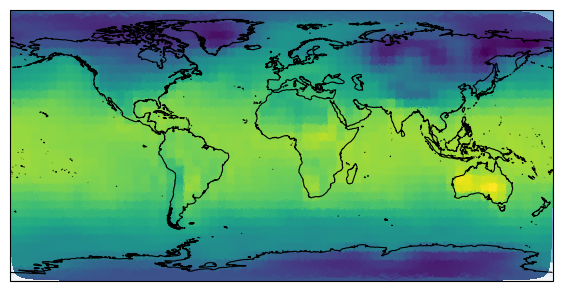

In [51]:
plt.figure(figsize=(7,4))

pc = ccrs.PlateCarree()

ax = plt.axes(projection=pc)
ax.stock_img()                                         # Includes an image of the surface.
ax.coastlines('50m', linewidth=0.8)

#ax.set_xlim(xs)
#ax.set_ylim(ys)

plt.figure
plt.tripcolor(triang, ds['t'][0] )

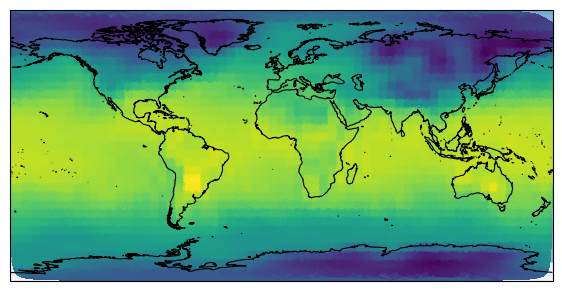

In [24]:
plt.figure(figsize=(7,4))

pc = ccrs.PlateCarree()

ax = plt.axes(projection=pc)
ax.stock_img()                                         # Includes an image of the surface.
ax.coastlines('50m', linewidth=0.8)

#ax.set_xlim(xs)
#ax.set_ylim(ys)

plt.figure
plt.tripcolor(triang, ds['t'][1] )

In [73]:
import xarray as xr
import numpy as np

# Open the NetCDF file
ds = xr.open_dataset("test.nc")

# Calculate mean, standard deviation, min, and max of the 't' variable over time, latitude, and longitude dimensions
mean_t = ds['t'].mean(dim=('time', 'latitude', 'longitude'))
std_t = ds['t'].std(dim=('time', 'latitude', 'longitude'))
min_t = ds['t'].min(dim=('time', 'latitude', 'longitude'))
max_t = ds['t'].max(dim=('time', 'latitude', 'longitude'))

# Print the calculated statistics
print("Mean of 't':\n", mean_t)
print("\nStandard deviation of 't':\n", std_t)
print("\nMinimum value of 't':\n", min_t)
print("\nMaximum value of 't':\n", max_t)

Mean of 't':
 <xarray.DataArray 't' ()>
array(277.34335, dtype=float32)

Standard deviation of 't':
 <xarray.DataArray 't' ()>
array(18.682642, dtype=float32)

Minimum value of 't':
 <xarray.DataArray 't' ()>
array(234.6979, dtype=float32)

Maximum value of 't':
 <xarray.DataArray 't' ()>
array(311.8151, dtype=float32)


In [75]:
import xarray as xr
import numpy as np

# Open the NetCDF file
ds = xr.open_dataset("output_icon_grid_data.nc")

# Calculate mean, standard deviation, min, and max of the 't' variable over time, latitude, and longitude dimensions
mean_t = ds['t'].mean(dim=('time','cell')) #skipNa = True)
std_t = ds['t'].std(dim=('time', 'cell'))
min_t = ds['t'].min(dim=('time', 'cell'))
max_t = ds['t'].max(dim=('time', 'cell'))

print("Mean of 't':\n", mean_t)
print("\nStandard deviation of 't':\n", std_t)
print("\nMinimum value of 't':\n", min_t)
print("\nMaximum value of 't':\n", max_t)

Mean of 't':
 <xarray.DataArray 't' ()>
array(286.01086, dtype=float32)

Standard deviation of 't':
 <xarray.DataArray 't' ()>
array(15.226651, dtype=float32)

Minimum value of 't':
 <xarray.DataArray 't' ()>
array(234.6979, dtype=float32)

Maximum value of 't':
 <xarray.DataArray 't' ()>
array(311.8151, dtype=float32)


The simple statistical analysis shows that the mean of temperature values of dataset interpolated on the icon grid is bigger than the mean of temperature values of dataset on the regular grid.